In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
models_batches = {
    'hf_Bert': [4, 6, 8, 10],
    'resnet50': [32, 64, 96, 128]
}

In [3]:
def plot_peak_mem(model_name, ymax):
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    batch_sizes = models_batches[model_name]
    for mode in range(2):
        peak_mems = []
        for batch_size in batch_sizes:
            with open(f'stats_{mode}_{model_name}_{batch_size}.json') as f:
                stats = json.load(f)
            peak_mems.append(stats['max_peak_memory'])
        peak_mems = np.array(peak_mems)
        batch_sizes = np.array(batch_sizes)
        axes[mode].bar(batch_sizes.astype(str), peak_mems/2**30)
        axes[mode].set_xlabel('Batch size')
        axes[mode].set_ylabel('Peak memory consumption (GB)')
        axes[mode].set_ylim(0, ymax)
        axes[mode].set_title(('No' if mode == 0 else 'Using') + ' activation checkpointing')
    fig.suptitle(('BERT' if model_name == 'hf_Bert' else 'ResNet-50') +
                 ': Peak memory consumption vs. batch size')

In [4]:
def plot_iteration_latency(model_name, ymax):
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    batch_sizes = models_batches[model_name]
    for mode in range(2):
        runtimes = []
        for batch_size in batch_sizes:
            with open(f'stats_{mode}_{model_name}_{batch_size}.json') as f:
                stats = json.load(f)
            runtimes.append(stats['iteration_latency'])
        runtimes = np.array(runtimes)
        batch_sizes = np.array(batch_sizes)
        axes[mode].bar(batch_sizes.astype(str), runtimes/1000)
        axes[mode].set_xlabel('Batch size')
        axes[mode].set_ylabel('Iteration latency (seconds)')
        axes[mode].set_ylim(0, ymax)
        axes[mode].set_title(('No' if mode == 0 else 'Using') + ' activation checkpointing')
    fig.suptitle(('BERT' if model_name == 'hf_Bert' else 'ResNet-50') +
                 ': Iteration latency vs. batch size')

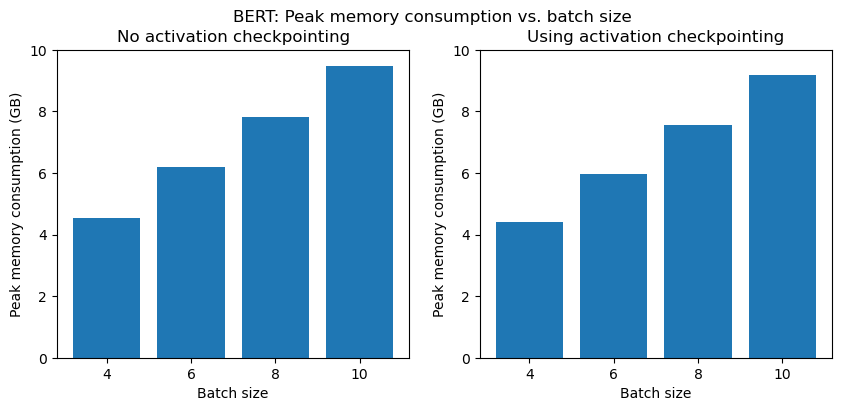

In [5]:
plot_peak_mem('hf_Bert', 10)

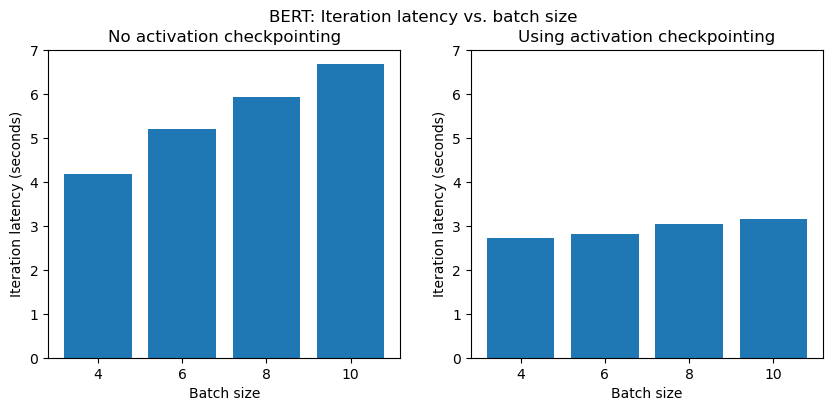

In [6]:
plot_iteration_latency('hf_Bert', 7)

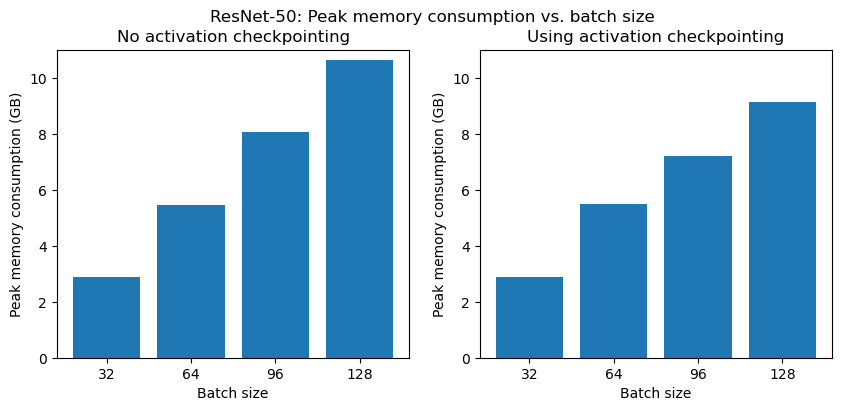

In [8]:
plot_peak_mem('resnet50', 11)

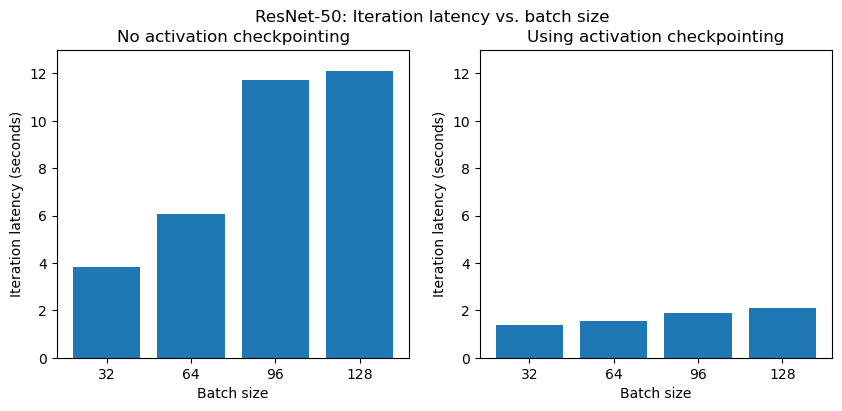

In [13]:
plot_iteration_latency('resnet50', 13)